Experiment5 Erdos-Renyi AUC

In [1]:
import numpy as np
import networkx as nx
import matplotlib as plt
from scipy import sparse
from NBTRsimilarity import similarity
from sklearn import model_selection
from sklearn import metrics
from edge_predictor import edge_predictor

In [2]:
G = nx.erdos_renyi_graph(10, 0.5, seed = 0)
nx.draw(G, with_labels=True)


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [3]:
A = nx.to_numpy_matrix(G)
L = nx.laplacian_matrix(G)
D = L + A
I = np.identity(10)
ones = np.array([1,1,1,1,1,1,1,1,1,1])


In [4]:
t = 0.30627933416080155


In [5]:
M = I - (A * t) + (D - I)*(t**2)
print(M)

[[ 1.37522812  0.          0.         -0.30627933 -0.30627933  0.
  -0.30627933  0.         -0.30627933 -0.30627933]
 [ 0.          1.09380703  0.          0.          0.         -0.30627933
   0.          0.         -0.30627933  0.        ]
 [ 0.          0.          1.          0.          0.          0.
  -0.30627933  0.          0.          0.        ]
 [-0.30627933  0.          0.          1.28142109 -0.30627933 -0.30627933
  -0.30627933  0.          0.          0.        ]
 [-0.30627933  0.          0.         -0.30627933  1.28142109 -0.30627933
   0.         -0.30627933  0.          0.        ]
 [ 0.         -0.30627933  0.         -0.30627933 -0.30627933  1.37522812
  -0.30627933  0.         -0.30627933  0.        ]
 [-0.30627933  0.         -0.30627933 -0.30627933  0.         -0.30627933
   1.46903515  0.         -0.30627933 -0.30627933]
 [ 0.          0.          0.          0.         -0.30627933  0.
   0.          1.09380703  0.         -0.30627933]
 [-0.30627933 -0.3062793

In [6]:
M_inv = np.linalg.inv(M)

In [7]:
centrality = (1 - (t**2))*ones*M_inv

In [8]:
centrality

matrix([[-1.67441974e+15, -8.89125648e+14, -5.26959685e+14,
         -1.49953253e+15, -1.31287839e+15, -1.56597327e+15,
         -1.72051989e+15, -7.52936260e+14, -1.60933690e+15,
         -1.37606234e+15]])

In [9]:
NBRW = (1 - t**2)*M_inv

In [10]:
#NBRW

In [11]:
(i,j) = (1,2)
similarity_score = NBRW[i,j] + NBRW[j,i]

In [12]:
print(similarity_score)

-72484935932361.22


In [13]:
t_vec = np.linspace(0,1,100)
#print(t_vec)

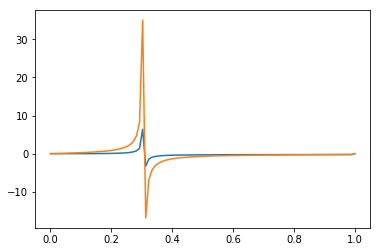

In [14]:
similarity_score1 = np.array([])
similarity_score2 = np.array([])
for i in t_vec:
    M1 = I - (A * i) + (D - I)*(i**2)
    M1_inv = np.linalg.inv(M1)
    NBRW1 = (1 - i**2)*M1_inv
    (k,l) = (1,2)
    similarity_score1 = np.append(similarity_score1,  NBRW1[k,l] + NBRW1[l,k])
    similarity_score2 = np.append(similarity_score2,  NBRW1[0,3] + NBRW1[3,0])
plt.pyplot.plot(t_vec, similarity_score1,t_vec, similarity_score2, label = True)

In [15]:
ro = nx.adjacency_spectrum(G)[0]
1/ro
C = np.block([[A,I-D],[I,np.zeros([10,10])]])
lam = np.amax(np.linalg.eigvals(C))
print(1/lam)

(0.30627933416080155+0j)


In [16]:
print(np.amax(similarity_score1),np.amax(similarity_score2))

6.402177726618879 34.993553015088295


In [17]:
similarity(G, i = 2)

{(2, 0): 0.027886848815258884,
 (2, 1): 0.005308647519081968,
 (2, 3): 0.025730760315688647,
 (2, 4): 0.00804701856407946,
 (2, 5): 0.025951349210792965,
 (2, 7): 0.0033153328682779186,
 (2, 8): 0.027665990731934917,
 (2, 9): 0.02543784340552752}

In [18]:
G.edges

EdgeView([(0, 3), (0, 4), (0, 6), (0, 8), (0, 9), (1, 5), (1, 8), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 7), (5, 6), (5, 8), (6, 8), (6, 9), (7, 9), (8, 9)])

In [19]:
E = []
G_complete = nx.complete_graph(G.number_of_nodes())
E_C = []
for j in G_complete.edges:
    if j in G.edges:
        E.append(j)
    else:
        E_C.append(j)
E,E_C

([(0, 3),
  (0, 4),
  (0, 6),
  (0, 8),
  (0, 9),
  (1, 5),
  (1, 8),
  (2, 6),
  (3, 4),
  (3, 5),
  (3, 6),
  (4, 5),
  (4, 7),
  (5, 6),
  (5, 8),
  (6, 8),
  (6, 9),
  (7, 9),
  (8, 9)],
 [(0, 1),
  (0, 2),
  (0, 5),
  (0, 7),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 6),
  (1, 7),
  (1, 9),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 7),
  (2, 8),
  (2, 9),
  (3, 7),
  (3, 8),
  (3, 9),
  (4, 6),
  (4, 8),
  (4, 9),
  (5, 7),
  (5, 9),
  (6, 7),
  (7, 8)])

In [50]:
E_T, E_P = model_selection.train_test_split(E, test_size = 0.1)
E_C = E_C + E_P

In [21]:
#Missing Edges
E_P

[(5, 6), (0, 9)]

In [62]:
G_T = nx.Graph(E_T)

In [63]:
edge_predictor(G_T)

{(0, 1): 0.22519591025725527,
 (0, 5): 0.253178057503503,
 (0, 7): 0.23266975805115844,
 (0, 2): 0.03488449157213422,
 (1, 9): 0.005030191388896266,
 (1, 3): 0.03488449157213421,
 (1, 6): 0.050301913888962664,
 (1, 4): 0.2251061897378178,
 (1, 7): 0.028725835619460554,
 (1, 2): 0.025741651614846737,
 (5, 9): 0.02529905251942549,
 (5, 7): 0.24769185685924877,
 (3, 9): 0.025501075961660943,
 (3, 8): 0.023266975805115848,
 (3, 7): 0.23266975805115847,
 (6, 9): 0.20209757878727563,
 (6, 7): 0.07480510239485036,
 (4, 9): 0.025303857066191357,
 (4, 8): 0.005746118170539313,
 (4, 6): 0.25303857066191354,
 (7, 9): 0.007480510239485039,
 (7, 8): 0.20110815071530952,
 (2, 9): 0.005030191388896267,
 (2, 5): 0.03292312148910804,
 (2, 8): 0.0028725835619460554,
 (2, 3): 0.2251959102572553,
 (2, 4): 0.22510618973781782,
 (2, 7): 0.02872583561946055}

In [64]:
d = edge_predictor(G_T)

In [65]:
import random


In [66]:
E_C, E_P

([(0, 1),
  (0, 2),
  (0, 5),
  (0, 7),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 6),
  (1, 7),
  (1, 9),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 7),
  (2, 8),
  (2, 9),
  (3, 7),
  (3, 8),
  (3, 9),
  (4, 6),
  (4, 8),
  (4, 9),
  (5, 7),
  (5, 9),
  (6, 7),
  (7, 8),
  (6, 9),
  (7, 9)],
 [(6, 9), (7, 9)])

In [75]:
y_true = [] 
y_scores = []
for i in E_C:
    
    y_scores.append(d[i])
    if i in E_P:
        y_true.append(1)
        
    else:
        y_true.append(0)



In [76]:
metrics.roc_auc_score(y_true, y_scores)

0.40384615384615385

In [77]:
from AUC import AUC_score

In [78]:
AUC_score(d,E_C, E_P)

0.40384615384615385

In [79]:
#Expected low score because its a random graph by definition